<a href="https://colab.research.google.com/github/Key1Lee/Data-Science-Professional-Experience/blob/master/world_happiness_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
dd_files = {
    '2017.csv': '1MWUH7grW2UKzjUAl1juZwWkSsPlk2KyW'
}

In [0]:
!pip install -U -q PyDrive			## First time install
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Download both files to cloud machine
for k,v in dd_files.items():
  downloaded = drive.CreateFile({'id': v}) # Get ID of file to download
  downloaded.GetContentFile('/tmp/' + k)

! ls /tmp

2017.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [0]:
# read data into a DataFrame
happiness = pd.read_csv('/tmp/2017.csv', index_col=0)
happiness.head()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Country,,,,,,,,,,,
Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [0]:
happiness.head()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Country,,,,,,,,,,,
Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [0]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, Norway to Central African Republic
Data columns (total 11 columns):
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1)
memory usage: 14.5+ KB


In [0]:
happiness.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [0]:
happiness.columns

Index(['Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.',
       'Dystopia.Residual'],
      dtype='object')

In [0]:
happiness.shape

(155, 11)

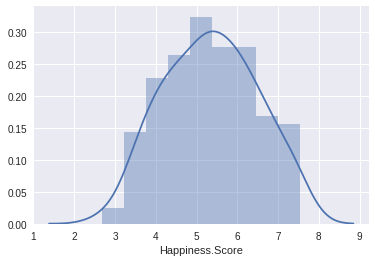

In [0]:
sns.distplot (happiness['Happiness.Score'])

In [0]:
happiness.corr()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Happiness.Rank,1.000000,-0.992774,-0.993058,-0.991533,-0.813244,-0.736753,-0.780716,-0.551608,-0.132620,-0.405842,-0.484506
Happiness.Score,-0.992774,1.000000,0.999497,0.999520,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080,0.475355
Whisker.high,-0.993058,0.999497,1.000000,0.998036,0.811868,0.750934,0.776634,0.569907,0.155462,0.426459,0.478824
Whisker.low,-0.991533,0.999520,0.998036,1.000000,0.812267,0.753767,0.786385,0.569808,0.154904,0.431223,0.471505
Economy..GDP.per.Capita.,-0.813244,0.812469,0.811868,0.812267,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
Family,-0.736753,0.752737,0.750934,0.753767,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
Health..Life.Expectancy.,-0.780716,0.781951,0.776634,0.786385,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
Freedom,-0.551608,0.570137,0.569907,0.569808,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
Generosity,-0.132620,0.155256,0.155462,0.154904,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
Trust..Government.Corruption.,-0.405842,0.429080,0.426459,0.431223,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755


In [0]:
X = happiness[['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
               'Freedom']]
y = happiness['Happiness.Score']

In [0]:
# create X and y
# R-Squared Metric explains the variance 
feature_cols = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
               'Freedom']
X = happiness[feature_cols]
y = happiness['Happiness.Score']

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

y_pred = linreg.predict(X)
metrics.r2_score(y, y_pred)

0.8056325565086679

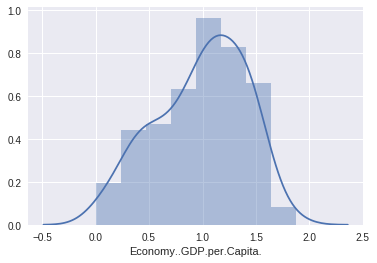

In [0]:
sns.distplot (happiness['Economy..GDP.per.Capita.'])

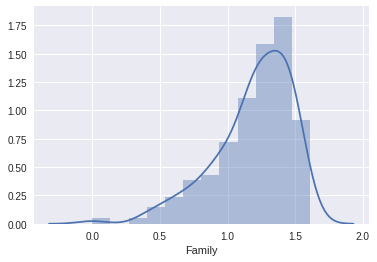

In [0]:
sns.distplot (happiness['Family'])

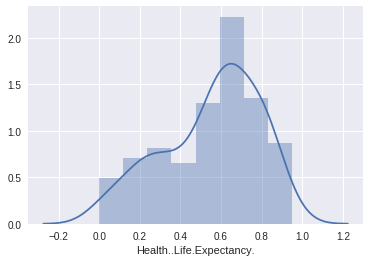

In [0]:
sns.distplot (happiness['Health..Life.Expectancy.'])

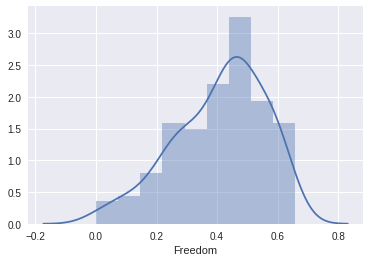

In [0]:
sns.distplot (happiness['Freedom'])

ESTIMATE THE MODEL COEFFICIENTS FOR THE HAPPINESS DATA USING SCIKIT-LEARN

In [0]:
# create X and y
# R-Squared Metric explains the variance 
feature_cols = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
               'Freedom']
X = happiness[feature_cols]
y = happiness['Happiness.Score']

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

# pair the feature names with the coefficients
dict(zip(feature_cols, linreg.coef_))

1.7991509939374475
[0.8178579  1.0684976  1.3029348  1.86115318]


{'Economy..GDP.per.Capita.': 0.817857901809208,
 'Family': 1.0684976029212803,
 'Freedom': 1.8611531781113493,
 'Health..Life.Expectancy.': 1.3029347963045361}

Interpreting the coefficients:

    Holding all other features fixed, a 1 unit increase in  is associated with an *increase of $21.52 *.
    Holding all other features fixed, a 1 unit increase in **GDP.per.Capita.** rating is associated with an *increase of **0.818** happiness score *.
    Holding all other features fixed, a 1 unit increase in **Family** rating is associated with an *increase of **1.069** happiness score*.
    Holding all other features fixed, a 1 unit increase in **Freedom** rating is associated with an *increase of **1.861** happiness score*.
    Holding all other features fixed, a 1 unit increase in **Health Life Expectancy** rating is associated with an *increase of **1.303** happiness score *.


In [0]:
X = happiness[['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
               'Freedom']]
y = happiness['Happiness.Score']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lm = LinearRegression()

In [0]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Predictions from our Model
Predictions off our test set and see how well it did!

In [0]:
predictions = lm.predict(X_test)

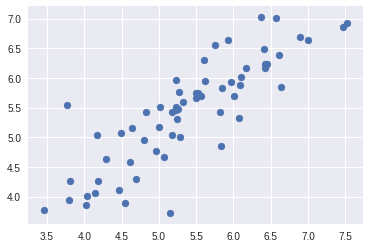

In [0]:
plt.scatter(y_test,predictions)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3841487637955291
MSE: 0.25532021057907966
RMSE: 0.5052922031647428


RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.